# Estimators, Bias and Variance

**Learning Objectives:** Learn about estimators, bias and variance.

## Imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1 Estimators

Remember the core diagram for inference in modelling:

**Model** $+$ **Observed Data** + **Training** $\rightarrow$ **Parameters**

Let's develop a more concrete mathematical language for these terms. This follows the notation in Deep Learning (Goodfellow et al., 2016).

For the **observed data**, let $\{ \mathbf{x}^{(1)}, \mathbf{x}^{(2)}, \ldots, \mathbf{x}^{(m)} \}$ be a set of $m$ independent observations. Each observation $\mathbf{x}^{(i)}$ can be a vector of variables. You can think of these as the $m$ rows of a tidy `DataFrame`.

Next assume that the **model** has a vector of parameters $\mathbf{\theta}$. Our goal is to use the data to determine the "best" estimate for this vector of parameters. Denote the best estimate as $\hat{\mathbf{\theta}}$.

A **point estimator** or **statistic** is any function of the data:

$$ \hat{\mathbf{\theta}}_m = g \left( \mathbf{x}^{(1)}, \mathbf{x}^{(2)}, \ldots, \mathbf{x}^{(m)} \right)$$

To see how this works, let's use the example of the normal distribution. Let's generate data points with a known mean $\mu$ and variance $\sigma^2$:

In [5]:
mu = 5.0
var = 0.5
theta = [mu, var]
data = np.random.normal(theta[0], np.sqrt(theta[1]), 50)

Notice how we are grouping the parameters $\mu$ and variance $\sigma^2$ into a vector of parameters $\mathbf{\theta}$. First, let's look at the data with a histogram:

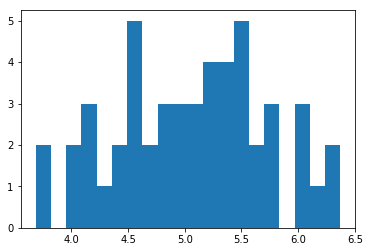

In [6]:
plt.hist(data, bins=20);

Notice, with this few observations, our estimated $\hat{\mathbf{\theta}}$ is not going to match the true values; we just don't have that much information about the true distribution. We are now going to treat this data as our observed data and use an estimator to find an estimate for these parameters *from the data alone*.

One possible estimator for $\mu$ is the sample mean,

$$ \hat{\mu} = \frac{1}{m} \sum_{i=1}^m x_i, $$

which we can compute as follows:

In [7]:
mu_hat = data.mean()
mu_hat

5.0702673666650693

One possible estimator for $\sigma^2$ is the population variance,

$$ \hat{\sigma}^2 = \frac{1}{m} \sum_{i=1}^m \left( x_i - \hat{\mu} \right)^2, $$

which we can compute as follows:

In [8]:
var_hat = data.var()
var_hat

0.44790055291601755

Then our estimate for $\hat{\mathbf{\theta}}$ is:

In [9]:
theta_hat = [mu_hat, var_hat]
theta_hat

[5.0702673666650693, 0.44790055291601755]

Compare this to the true value:

In [10]:
theta

[5.0, 0.5]

To emphasize that choice and flexibility that we have in picking estimators, consider the alternate estimator for $\mu$:

$ \hat{\mu} = $ pick the smallest value in the data set:

In [11]:
data.min()

3.686007049005636

In this case, this estimator isn't that much worse than using the mean, but we would expect it to be much worse much of the time.

There are a number of questions that need to be answered about this process:

* **Are the estimators that we used the best ones?** A closely related question is "how difficult is it to find a good estimator?" In some cases is it very easy to find a good estimator. In other cases, it is very difficult.
* **How does the quality of our estimates improve with more data?** In general, we expect more data to give better estimates, but that is not necessarily the case.
* **Have we used the right model in the first place?** In our example above, we knew precisely which probability distribution to use as our model (the normal distribution), as we ourselves generated the data using that very model. However, in most cases, we have no idea what the actual model is. We may find excellent estimators for our model, but if we have chosen the wrong model, it won't matter much.

## Bias

One measure of how good our estimators are is the idea of bias. Bias can be formalized using the language of expectation values. In this case, we will use data to illustrate how this works.

Take the above estimator for the variance of the normal distribution:

$$ \hat{\sigma}^2 = \frac{1}{m} \sum_{i=1}^m \left( x_i - \hat{\mu} \right)^2 $$

I claim that this estimator is **biased** and that a better one exists. We will need to define what we mean by **bias**. Furthermore, I claim that the following estimator is **unbiased**:

$$ \hat{\sigma}^2 = \frac{1}{m-1} \sum_{i=1}^m \left( x_i - \hat{\mu} \right)^2 $$

Notice the simple replacement $m \rightarrow m-1$. The number $1$ here is called the **degrees of freedom** and the correction is known as [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction). To see the difference between these two estimators, let's compute their bias.

The **bias** of an estimator is defined as:

$$ Bias[\hat{\theta}] = E[\hat{\theta}] - \theta $$

In general, computing his requires performing integrals over the true probability distribution, treating the estimator as a random variable. In our case, we are going to estimate the bias of the estimators using simulation. We will use the following process:

1. Treat the estimator $\hat{\theta}_m$ as a random variable by drawing $m$ observations from the model with the true parameters $\theta$ and compute the estimator for those observations.
2. Repeat this process to get a distribution of values for $\hat{\theta}_m$.
3. Then take the mean of those values ($E[\hat{\theta}]$) and subtract the true value of the parameter $E[\hat{\theta}] - \theta$.

Here are two functions that return a random variable for the biased and unbiased estimators above (step 1):

In [19]:
def biased_var(theta, observations):
    data = np.random.normal(theta[0], np.sqrt(theta[1]), size=observations)
    return data.var()

def unbiased_var(theta, observations):
    data = np.random.normal(theta[0], np.sqrt(theta[1]), size=observations)
    return data.var(ddof=1)

Here is the number of observations we are going to use:

In [20]:
observations = 5

To convince ourselves that the estimators can be treated as a random variable, let's call one multiple times:

In [21]:
for i in range(10):
    print(biased_var(theta, observations))

0.527075674047
0.149940666712
0.165118543026
0.158936239354
0.0940055080491
0.393429558812
0.333684269806
0.34951023997
0.461802646854
0.262951762683


Now let's create a vector of those random variables, for both the biased and unbiased estimator (step 2):

In [22]:
var_dist1 = np.array([biased_var(theta, observations) for i in range(1000)])
var_dist2 = np.array([unbiased_var(theta, observations) for i in range(1000)])

Finally, compute the mean and subtract the true value (step 3):

In [23]:
bias1 = var_dist1.mean() - theta[1]
bias2 = var_dist2.mean() - theta[1]
print("Bias of biased esimator: {}".format(bias1))
print("Bias of unbiased esimator: {}".format(bias2))

Bias of biased esimator: -0.10441523728101187
Bias of unbiased esimator: 0.006335378005375536


Now we can see why the unbiased estimator is called unbiased; it has a smaller bias. To see that the bias of the unbiased estimator is exactly zero, you need to compute the bias analytically by performing integrals to compute the expectation value of the estimator with respect to the model's probability distribution.

The other thing to explore is how the bias of an estimator changes with the number of observations. This gives us a sense of how an estimator will work on a small or large dataset.

In [24]:
np.random.seed(0)
m = np.arange(5, 101, 1, dtype=int)
biased_data = np.empty_like(m, dtype=float)
unbiased_data = np.empty_like(m, dtype=float)

for i in range(len(m)):
    biased_data[i] = np.array([biased_var(theta, m[i]) for p in range(500)]).mean()
    unbiased_data[i] = np.array([unbiased_var(theta, m[i]) for p in range(500)]).mean()

Let's visualize the results by plotting the biased and unbiased variance estimates versus the number of observations $m$. We also show the true value with a horizontal grey line:

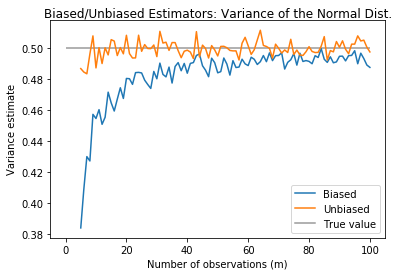

In [25]:
plt.plot(m, biased_data, label='Biased')
plt.plot(m, unbiased_data, label='Unbiased')
plt.hlines(theta[1], 0, 100, color='grey', alpha=0.8, label="True value")
plt.ylabel('Variance estimate')
plt.xlabel('Number of observations (m)')
plt.title('Biased/Unbiased Estimators: Variance of the Normal Dist.')
plt.legend();

This is quite striking:

* The unbiased estimate is reasonably close to the true value, even for very small numbers of observations. Thus, with the unbiased estimator, it is possible to get a good estimate of the true value, even with few observations.
* At small numbers of observations, the biased estimator is *biased* away from the true value towards much smaller values. Thus, it will not give us a very good estimate of the true value. We may have a good model (the normal distribution), but our estimate of its variance will be far from the true value.
* As the number of observations goes up, the biased estimate coverges on the unbiased one and true value.

An estimator that converges to the true value as the number of observations increases is called **consistent**. 

This example again emphasizes the following fundamental truths about modelling:

1. First pick a good model.
2. Then pick good estimators for its parameters.

Both of these steps can be *extremely* difficult, or even impossible! State of the art models have as many as a billion unknown parameters, and the best estimators take hundreds of years of CPU time to run.

## 3 Variance

One might hope that bias was the only thing that you need to be concerned about when picking an estimator. That is not the case. There is another property of an estimator, called the variance, that also needs to be considered.

Note, there are two variances here:

* The estimator for the variance
* The variance of that estimator

To see where the variance of the estimator comes in, let's think back to when we generated an entire distribution of estimators (remember, we treated them as random variables above). Let's look at the distribution of estimator values for the biased and unbiased estimators:

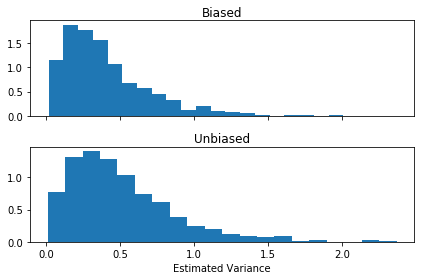

In [51]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].hist(var_dist1, bins=20, normed=True)
ax[0].set_title('Biased')
ax[1].hist(var_dist2, bins=20, normed=True)
ax[1].set_title('Unbiased')
ax[1].set_xlabel('Estimated Variance')
plt.tight_layout();

In computing the bias of these estimators, we took the mean of these distributions:

In [52]:
var_dist1.mean(), var_dist2.mean()

(0.39673827391822808, 0.50876335845045517)

The **variance** of the estimators are just the variance of these distributions:

In [53]:
var_dist1.var(), var_dist2.var()

(0.079508661678248022, 0.13086209506213567)

Here is the surprise:

**The estimator with the smaller biased has a larger variance.**

Using basic properties of expectation values it is possible to show that that [mean-squared-error](https://en.wikipedia.org/wiki/Mean_squared_error) (MSE) of an estimator is equal to the sum of the following two terms:

$$ MSE[\hat{\theta}] = Bias[\hat{\theta}]^2 + Var[\hat{\theta}] $$

Thus, if you want to minimize the error in an estimator, you have to deal with both bias and variance. It is important to note that this is an equation for a single estimator and can't be used to compare two estimators. Here is a summary of the take-home:

> The overall error of an estimator has contributions from both the bias and variance. Thus, using an unbiased estimator is not necessarily optimal.

Amazingly, the estimator for the $\sigma^2$ parameter of the normal distribution with the smallest MSE can be shown to be:

$$ \hat{\sigma}^2 = \frac{1}{m+1} \sum_{i=1}^m \left( x_i - \hat{\mu} \right)^2 $$

This this estimator has even more bias than the original one we considered. The minimized MSE is possible because of the low variance. This pattern is known as the "bias/variance tradeoff" and is one of the most important ideas in modelling and machine learning.